In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_patients_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/patients.csv")
orig_claims_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/claims.csv")
orig_payers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/payers.csv")
orig_providers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/providers.csv")
orig_revenue_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/revenue.csv")
orig_externalfact_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/external_factors.csv")

In [3]:
print(orig_patients_df.info())
print(orig_claims_df.info())
print(orig_payers_df.info())
print(orig_providers_df.info())
print(orig_revenue_df.info())
print(orig_externalfact_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      10000 non-null  object
 1   Age            10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   City           10000 non-null  object
 4   State          10000 non-null  object
 5   InsuranceType  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClaimID         50000 non-null  object 
 1   PatientID       50000 non-null  object 
 2   PayerID         50000 non-null  object 
 3   ProviderID      50000 non-null  object 
 4   ClaimAmount     50000 non-null  float64
 5   Reimbursement   50000 non-null  float64
 6   DenialStatus    50

In [4]:
print(orig_patients_df.describe())
print(orig_claims_df.describe())
print(orig_payers_df.describe())
print(orig_revenue_df.describe())
print(orig_externalfact_df.describe())

                Age
count  10000.000000
mean      53.418300
std       20.795893
min       18.000000
25%       35.000000
50%       53.000000
75%       71.000000
max       89.000000
        ClaimAmount  Reimbursement
count  50000.000000   50000.000000
mean    5088.861337    1943.359486
std     2826.382597    2203.874252
min      200.050000       0.000000
25%     2639.312500      75.045000
50%     5089.140000    1105.595000
75%     7533.352500    3130.195000
max     9999.730000    9926.060000
       ReimbursementRate
count          50.000000
mean            0.749800
std             0.148825
min             0.510000
25%             0.632500
50%             0.720000
75%             0.870000
max             1.000000
       TotalRevenue  ClaimsProcessed  PatientsServed
count  3.600000e+01        36.000000       36.000000
mean   4.752308e+06      1388.888889     1295.000000
std    7.326048e+05       211.776672      192.791671
min    7.774786e+05       240.000000      239.000000
25%    4.761476

In [5]:
print(orig_patients_df.head())
print(orig_claims_df.head())
print(orig_payers_df.head())
print(orig_providers_df.head())
print(orig_revenue_df.head())
print(orig_externalfact_df.head())

  PatientID  Age  Gender          City State InsuranceType
0    P00001   72    Male    Chavezfurt    SC    Government
1    P00002   53  Female   Hollandview    MN       Private
2    P00003   54  Female  Port Lindsey    NM    Government
3    P00004   31  Female   Travismouth    IN       Private
4    P00005   44    Male  Barrychester    KS    Government
   ClaimID PatientID PayerID ProviderID  ClaimAmount  Reimbursement  \
0  C000001    P02949   PY039     PR0388      3870.49        1052.79   
1  C000002    P03936   PY038     PR0253      9517.00        7885.48   
2  C000003    P06831   PY033     PR0244      7373.54           0.00   
3  C000004    P03710   PY042     PR0038      6066.85        5590.40   
4  C000005    P01290   PY023     PR0014      1728.98         379.85   

  DenialStatus ServiceDate SubmissionDate ProcessedDate  
0           No    9/3/2022      10/1/2022     10/8/2022  
1           No   12/6/2022     12/15/2022    12/22/2022  
2          Yes   11/5/2023      11/8/2023    

In [6]:
patients_df = orig_patients_df.copy()
claims_df = orig_claims_df.copy()
payers_df = orig_payers_df.copy()
providers_df = orig_providers_df.copy()
revenue_df = orig_revenue_df.copy()
externalfact_df = orig_externalfact_df.copy()

In [7]:
#Convert to datetime
claims_df['ServiceDate'] = pd.to_datetime(claims_df['ServiceDate'])
claims_df['SubmissionDate'] = pd.to_datetime(claims_df['SubmissionDate'])
claims_df['ProcessedDate'] = pd.to_datetime(claims_df['ProcessedDate'])

In [8]:
# Convert to datetime
revenue_df['MonthID'] = pd.to_datetime(revenue_df['MonthID'], format='%Y-%m')
externalfact_df['MonthID'] = pd.to_datetime(externalfact_df['MonthID'], format='%Y-%m')

# Convert to Period (Year-Month)
revenue_df['MonthID'] = revenue_df['MonthID'].dt.to_period('M')
externalfact_df['MonthID'] = externalfact_df['MonthID'].dt.to_period('M')

In [9]:
print(revenue_df.head())

   MonthID  TotalRevenue  ClaimsProcessed  PatientsServed
0  2022-01     777478.64              240             239
1  2022-02    3840660.15             1097            1045
2  2022-03    4812872.62             1471            1361
3  2022-04    5000918.17             1485            1371
4  2022-05    5278201.83             1556            1444


In [10]:
#Handling missing values
print(patients_df.isnull().sum())
print(claims_df.isnull().sum())
print(payers_df.isnull().sum())
print(providers_df.isnull().sum())
print(revenue_df.isnull().sum())
print(externalfact_df.isnull().sum())

PatientID        0
Age              0
Gender           0
City             0
State            0
InsuranceType    0
dtype: int64
ClaimID           0
PatientID         0
PayerID           0
ProviderID        0
ClaimAmount       0
Reimbursement     0
DenialStatus      0
ServiceDate       0
SubmissionDate    0
ProcessedDate     0
dtype: int64
PayerID              0
PayerName            0
PayerCategory        0
ReimbursementRate    0
dtype: int64
ProviderID      0
ProviderName    0
Specialty       0
City            0
State           0
dtype: int64
MonthID            0
TotalRevenue       0
ClaimsProcessed    0
PatientsServed     0
dtype: int64
MonthID           0
InflationRate     0
PublicEvents     25
PolicyChanges    31
dtype: int64


In [11]:
#Filling null values 
externalfact_df['PublicEvents'] = externalfact_df['PublicEvents'].fillna("No Events")
externalfact_df['PolicyChanges'] = externalfact_df['PolicyChanges'].fillna("No Changes")

In [12]:
#Duplicate values
print(patients_df.duplicated().sum())
print(claims_df.duplicated().sum())
print(payers_df.duplicated().sum())
print(providers_df.duplicated().sum())
print(revenue_df.duplicated().sum())
print(externalfact_df.duplicated().sum())

0
0
0
0
0
0


In [13]:
#Data validation
claims_df = claims_df[claims_df['PatientID'].isin(patients_df['PatientID'])]
claims_df = claims_df[claims_df['PayerID'].isin(payers_df['PayerID'])]
claims_df = claims_df[claims_df['ProviderID'].isin(providers_df['ProviderID'])]
claims_df = claims_df[claims_df['ServiceDate']<claims_df['SubmissionDate']]
claims_df = claims_df[claims_df['SubmissionDate']<claims_df['ProcessedDate']]
claims_df = claims_df[claims_df['ClaimAmount']>=claims_df['Reimbursement']]

In [14]:
claims_yearly = claims_df.groupby(claims_df['ProcessedDate'].dt.year)['ClaimID'].count()
revenueclaims_yearly = revenue_df.groupby(revenue_df['MonthID'].dt.year)['ClaimsProcessed'].sum()

In [15]:
#Claims validation across claims and revenue tables
print("Claims table count:",claims_yearly)
print("Revenue table count:",revenueclaims_yearly)

Claims table count: ProcessedDate
2022    15725
2023    17216
2024    17059
Name: ClaimID, dtype: int64
Revenue table count: MonthID
2022    15725
2023    17216
2024    17059
Name: ClaimsProcessed, dtype: int64


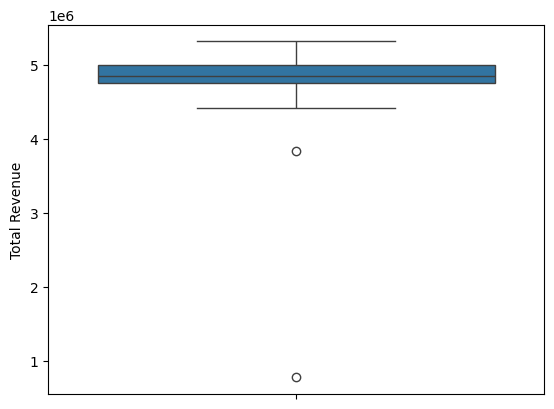

In [16]:
sns.boxplot(y='TotalRevenue',data=revenue_df)
plt.ylabel("Total Revenue")
plt.show()